##### 필요한 라이브러리 불러오기

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [22]:
import os
os.chdir('/Users/jun/GitStudy/Data_4/Data/eCommerce3')

##### csv파일 업로드

In [23]:
orders = pd.read_csv('orders.csv')
order_items = pd.read_csv('order_items.csv')
products = pd.read_csv('products.csv')
payments = pd.read_csv('payments.csv')
customers = pd.read_csv('customers.csv')
capstone_data_cleaned = pd.read_csv('capstone_data_cleaned.csv')

#### orders 주문 테이블

In [24]:
orders.T

,0,1,2,3,4,5,6,7,8,9,...,99431,99432,99433,99434,99435,99436,99437,99438,99439,99440
order_id,e481f51cbdc54678b7cc49136f2d6af7,53cdb2fc8bc7dce0b6741e2150273451,47770eb9100c2d0c44946d9cf07ec65d,949d5b44dbf5de918fe9c16f97b45f8a,ad21c59c0840e6cb83a9ceb5573f8159,a4591c265e18cb1dcee52889e2d8acc3,136cce7faa42fdb2cefd53fdc79a6098,6514b8ad8028c9f2cc2374ded245783f,76c6e866289321a7c93b82b54852dc33,e69bfb5eb88e0ed6a785585b27e16dbf,...,b0f4af5c1b06e24fef510703bfe9f0a6,cfa78b997e329a5295b4ee6972c02979,9115830be804184b91f5c00f6f49f92d,aa04ef5214580b06b10e2a378300db44,880675dff2150932f1601e1c07eadeeb,9c5dedf39a927c1b2549525ed64a053c,63943bddc261676b46f01ca7ac2f7bd8,83c1379a015df1e13d02aae0204711ab,11c177c8e97725db2631073c19f07b62,66dea50a8b16d9b4dee7af250b4be1a5
customer_id,7c396fd4830fd04220f754e42b4e5bff,af07308b275d755c9edb36a90c618231,3a653a41f6f9fc3d2a113cf8398680e8,7c142cf63193a1473d2e66489a9ae977,72632f0f9dd73dfee390c9b22eb56dd6,80bb27c7c16e8f973207a5086ab329e2,36edbb3fb164b1f16485364b6fb04c73,932afa1e708222e5821dac9cd5db4cae,39382392765b6dc74812866ee5ee92a7,299905e3934e9e181bfb2e164dd4b4f8,...,1a3b8f1d0782ebedbcf220a96cbc1655,a49e8e11e850592fe685ae3c64b40eca,c716cf2b5b86fb24257cffe9e7969df8,e03dbdf5e56c96b106d8115ac336f47f,831ce3f1bacbd424fc4e38fbd4d66d29,6359f309b166b0196dbf7ad2ac62bb5a,da62f9e57a76d978d02ab5362c509660,737520a9aad80b3fbbdad19b66b37b30,5097a5312c8b157bb7be58ae360ef43c,60350aa974b26ff12caad89e55993bd6
order_status,delivered,delivered,delivered,delivered,delivered,delivered,invoiced,delivered,delivered,delivered,...,delivered,delivered,delivered,delivered,delivered,delivered,delivered,delivered,delivered,delivered
order_purchase_timestamp,10/2/2017 10:56,7/24/2018 20:41,8/8/2018 8:38,11/18/2017 19:28,2/13/2018 21:18,7/9/2017 21:57,4/11/2017 12:22,5/16/2017 13:10,1/23/2017 18:29,7/29/2017 11:55,...,10/27/2017 15:21,12/20/2017 9:52,10/4/2017 19:57,1/27/2017 0:30,2/23/2017 9:05,3/9/2017 9:54,2/6/2018 12:58,8/27/2017 14:46,1/8/2018 21:28,3/8/2018 20:57
order_approved_at,10/2/2017 11:07,7/26/2018 3:24,8/8/2018 8:55,11/18/2017 19:45,2/13/2018 22:20,7/9/2017 22:10,4/13/2017 13:25,5/16/2017 13:22,1/25/2017 2:50,7/29/2017 12:05,...,10/27/2017 15:32,12/20/2017 10:09,10/4/2017 20:07,1/27/2017 1:05,2/23/2017 9:15,3/9/2017 9:54,2/6/2018 13:10,8/27/2017 15:04,1/8/2018 21:36,3/9/2018 11:20
order_delivered_timestamp,10/10/2017 21:25,8/7/2018 15:27,8/17/2018 18:06,12/2/2017 0:28,2/16/2018 18:17,7/26/2017 10:57,NaN,5/26/2017 12:55,2/2/2017 14:08,8/16/2017 17:14,...,11/10/2017 17:57,1/26/2018 15:45,10/20/2017 20:25,2/7/2017 13:15,3/6/2017 11:08,3/17/2017 15:08,2/28/2018 17:37,9/21/2017 11:24,1/25/2018 23:32,3/16/2018 13:08
order_estimated_delivery_date,10/18/2017 0:00,8/13/2018 0:00,9/4/2018 0:00,12/15/2017 0:00,2/26/2018 0:00,8/1/2017 0:00,5/9/2017 0:00,6/7/2017 0:00,3/6/2017 0:00,8/23/2017 0:00,...,11/22/2017 0:00,1/18/2018 0:00,11/7/2017 0:00,3/17/2017 0:00,3/22/2017 0:00,3/28/2017 0:00,3/2/2018 0:00,9/27/2017 0:00,2/15/2018 0:00,4/3/2018 0:00


In [25]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_timestamp      96476 non-null  object
 6   order_estimated_delivery_date  99441 non-null  object
dtypes: object(7)
memory usage: 5.3+ MB


In [26]:
orders['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

#### order_status
##### delivered, 고객에게 배송완료된 상태
##### invoiced, 주문 청구서 생성(배송 전)
##### shipped, 배송 출발
##### processing, 주문 처리중
##### unavailable,주문 이용불가(재고소진?)
##### canceled, 주문 취소
##### created, 주문 저장 초기 상태
##### approved 주문 승인

In [27]:
# 결측치 확인
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_timestamp        2965
order_estimated_delivery_date       0
dtype: int64

##### order_approved_at          160 판매자 주문 승인 시점 
##### order_delivered_timestamp 2965 고객에게 배송된 시점
### order_purchase_timestamp  고객이 주문한 시점 테이블이랑 
### order_estimated_delivery_date 예상 배송날짜 테이블이 있으니까 두가지 결측치는 제거함

In [17]:
# 결측티 제거 전
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_timestamp      96476 non-null  object
 6   order_estimated_delivery_date  99441 non-null  object
dtypes: object(7)
memory usage: 5.3+ MB


In [35]:
# 결측치 제거
orders.dropna(subset=['order_approved_at','order_delivered_timestamp'],inplace=True)
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96462 entries, 0 to 99440
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       96462 non-null  object
 1   customer_id                    96462 non-null  object
 2   order_status                   96462 non-null  object
 3   order_purchase_timestamp       96462 non-null  object
 4   order_approved_at              96462 non-null  object
 5   order_delivered_timestamp      96462 non-null  object
 6   order_estimated_delivery_date  96462 non-null  object
dtypes: object(7)
memory usage: 5.9+ MB


In [29]:
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,10/2/2017 10:56,10/2/2017 11:07,10/10/2017 21:25,10/18/2017 0:00
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,7/24/2018 20:41,7/26/2018 3:24,8/7/2018 15:27,8/13/2018 0:00
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,8/8/2018 8:38,8/8/2018 8:55,8/17/2018 18:06,9/4/2018 0:00
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,delivered,11/18/2017 19:28,11/18/2017 19:45,12/2/2017 0:28,12/15/2017 0:00
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,delivered,2/13/2018 21:18,2/13/2018 22:20,2/16/2018 18:17,2/26/2018 0:00
...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,6359f309b166b0196dbf7ad2ac62bb5a,delivered,3/9/2017 9:54,3/9/2017 9:54,3/17/2017 15:08,3/28/2017 0:00
99437,63943bddc261676b46f01ca7ac2f7bd8,da62f9e57a76d978d02ab5362c509660,delivered,2/6/2018 12:58,2/6/2018 13:10,2/28/2018 17:37,3/2/2018 0:00
99438,83c1379a015df1e13d02aae0204711ab,737520a9aad80b3fbbdad19b66b37b30,delivered,8/27/2017 14:46,8/27/2017 15:04,9/21/2017 11:24,9/27/2017 0:00
99439,11c177c8e97725db2631073c19f07b62,5097a5312c8b157bb7be58ae360ef43c,delivered,1/8/2018 21:28,1/8/2018 21:36,1/25/2018 23:32,2/15/2018 0:00


In [36]:
# 결측치 합
print(2965+160)
# 결측치 제거 전 후 수 비교
print(99441-96462)
# 중복된 결측치
print(3125-2979)
# 전 - 결측치 = 후
print(99441-2979)

3125
2979
146
96462


In [37]:
# 결측치 제거 후 oreder_status는 두가지만 남음
orders['order_status'].unique()

array(['delivered', 'canceled'], dtype=object)

#####
order_purchase_timestamp 고객이 주문한 시점
order_approved_at 판매자 주문 승인 시점  
order_delivered_timestamp 고객에게 배송된 시점
order_estimated_delivery_date 예상 배송 날짜

In [29]:
orders.T

,0,1,2,3,4,5,7,8,9,10,...,99431,99432,99433,99434,99435,99436,99437,99438,99439,99440
order_id,e481f51cbdc54678b7cc49136f2d6af7,53cdb2fc8bc7dce0b6741e2150273451,47770eb9100c2d0c44946d9cf07ec65d,949d5b44dbf5de918fe9c16f97b45f8a,ad21c59c0840e6cb83a9ceb5573f8159,a4591c265e18cb1dcee52889e2d8acc3,6514b8ad8028c9f2cc2374ded245783f,76c6e866289321a7c93b82b54852dc33,e69bfb5eb88e0ed6a785585b27e16dbf,e6ce16cb79ec1d90b1da9085a6118aeb,...,b0f4af5c1b06e24fef510703bfe9f0a6,cfa78b997e329a5295b4ee6972c02979,9115830be804184b91f5c00f6f49f92d,aa04ef5214580b06b10e2a378300db44,880675dff2150932f1601e1c07eadeeb,9c5dedf39a927c1b2549525ed64a053c,63943bddc261676b46f01ca7ac2f7bd8,83c1379a015df1e13d02aae0204711ab,11c177c8e97725db2631073c19f07b62,66dea50a8b16d9b4dee7af250b4be1a5
customer_id,7c396fd4830fd04220f754e42b4e5bff,af07308b275d755c9edb36a90c618231,3a653a41f6f9fc3d2a113cf8398680e8,7c142cf63193a1473d2e66489a9ae977,72632f0f9dd73dfee390c9b22eb56dd6,80bb27c7c16e8f973207a5086ab329e2,932afa1e708222e5821dac9cd5db4cae,39382392765b6dc74812866ee5ee92a7,299905e3934e9e181bfb2e164dd4b4f8,f2a85dec752b8517b5e58a06ff3cd937,...,1a3b8f1d0782ebedbcf220a96cbc1655,a49e8e11e850592fe685ae3c64b40eca,c716cf2b5b86fb24257cffe9e7969df8,e03dbdf5e56c96b106d8115ac336f47f,831ce3f1bacbd424fc4e38fbd4d66d29,6359f309b166b0196dbf7ad2ac62bb5a,da62f9e57a76d978d02ab5362c509660,737520a9aad80b3fbbdad19b66b37b30,5097a5312c8b157bb7be58ae360ef43c,60350aa974b26ff12caad89e55993bd6
order_status,delivered,delivered,delivered,delivered,delivered,delivered,delivered,delivered,delivered,delivered,...,delivered,delivered,delivered,delivered,delivered,delivered,delivered,delivered,delivered,delivered
order_purchase_timestamp,2017-10-02 10:56:00,2018-07-24 20:41:00,2018-08-08 08:38:00,2017-11-18 19:28:00,2018-02-13 21:18:00,2017-07-09 21:57:00,2017-05-16 13:10:00,2017-01-23 18:29:00,2017-07-29 11:55:00,2017-05-16 19:41:00,...,2017-10-27 15:21:00,2017-12-20 09:52:00,2017-10-04 19:57:00,2017-01-27 00:30:00,2017-02-23 09:05:00,2017-03-09 09:54:00,2018-02-06 12:58:00,2017-08-27 14:46:00,2018-01-08 21:28:00,2018-03-08 20:57:00
order_approved_at,2017-10-02 11:07:00,2018-07-26 03:24:00,2018-08-08 08:55:00,2017-11-18 19:45:00,2018-02-13 22:20:00,2017-07-09 22:10:00,2017-05-16 13:22:00,2017-01-25 02:50:00,2017-07-29 12:05:00,2017-05-16 19:50:00,...,2017-10-27 15:32:00,2017-12-20 10:09:00,2017-10-04 20:07:00,2017-01-27 01:05:00,2017-02-23 09:15:00,2017-03-09 09:54:00,2018-02-06 13:10:00,2017-08-27 15:04:00,2018-01-08 21:36:00,2018-03-09 11:20:00
order_delivered_timestamp,2017-10-10 21:25:00,2018-08-07 15:27:00,2018-08-17 18:06:00,2017-12-02 00:28:00,2018-02-16 18:17:00,2017-07-26 10:57:00,2017-05-26 12:55:00,2017-02-02 14:08:00,2017-08-16 17:14:00,2017-05-29 11:18:00,...,2017-11-10 17:57:00,2018-01-26 15:45:00,2017-10-20 20:25:00,2017-02-07 13:15:00,2017-03-06 11:08:00,2017-03-17 15:08:00,2018-02-28 17:37:00,2017-09-21 11:24:00,2018-01-25 23:32:00,2018-03-16 13:08:00
order_estimated_delivery_date,2017-10-18 00:00:00,2018-08-13 00:00:00,2018-09-04 00:00:00,2017-12-15 00:00:00,2018-02-26 00:00:00,2017-08-01 00:00:00,2017-06-07 00:00:00,2017-03-06 00:00:00,2017-08-23 00:00:00,2017-06-07 00:00:00,...,2017-11-22 00:00:00,2018-01-18 00:00:00,2017-11-07 00:00:00,2017-03-17 00:00:00,2017-03-22 00:00:00,2017-03-28 00:00:00,2018-03-02 00:00:00,2017-09-27 00:00:00,2018-02-15 00:00:00,2018-04-03 00:00:00


In [38]:
# 데이터 형식 바꾸기
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'], errors = 'coerce')
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'], errors = 'coerce')
orders['order_delivered_timestamp'] = pd.to_datetime(orders['order_delivered_timestamp'], errors = 'coerce')
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'], errors = 'coerce')
# orders['order_status'] = orders['order_status'].astype('object')
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96462 entries, 0 to 99440
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96462 non-null  object        
 1   customer_id                    96462 non-null  object        
 2   order_status                   96462 non-null  object        
 3   order_purchase_timestamp       96462 non-null  datetime64[ns]
 4   order_approved_at              96462 non-null  datetime64[ns]
 5   order_delivered_timestamp      96462 non-null  datetime64[ns]
 6   order_estimated_delivery_date  96462 non-null  datetime64[ns]
dtypes: datetime64[ns](4), object(3)
memory usage: 5.9+ MB


In [39]:
orders.describe()

/var/folders/29/5wmqbm4j3x10qv5vgm_bm8f80000gn/T/ipykernel_45453/3333036027.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders.describe()
/var/folders/29/5wmqbm4j3x10qv5vgm_bm8f80000gn/T/ipykernel_45453/3333036027.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders.describe()
/var/folders/29/5wmqbm4j3x10qv5vgm_bm8f80000gn/T/ipykernel_45453/3333036027.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adop

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
count,96462,96462,96462,96462,96462,96462,96462
unique,96462,93343,2,86341,49451,75637,445
top,e481f51cbdc54678b7cc49136f2d6af7,8d50f5eadf50201ccdcedfb9e2ac8455,delivered,2018-08-02 12:06:00,2018-01-10 10:32:00,2018-05-21 19:28:00,2017-12-20 00:00:00
freq,1,15,96456,28,108,7,507
first,NaN,NaN,NaN,2016-09-15 12:16:00,2016-09-15 12:16:00,2016-10-11 13:46:00,2016-10-04 00:00:00
last,NaN,NaN,NaN,2018-08-29 15:00:00,2018-08-29 15:10:00,2018-10-17 13:22:00,2018-10-25 00:00:00


In [41]:
# 날짜 데이터 이상치확인
# 역방향이면 이상치로 의심
Check_date_outliers = orders[
    (orders['order_purchase_timestamp'] > orders['order_approved_at']) |
    (orders['order_approved_at'] > orders['order_delivered_timestamp']) 
]
print(len(Check_date_outliers))

61


In [42]:
# 이상치 의심 데이터 확인
Check_date_outliers.head().T

,199,483,1986,3659,11738
order_id,58d4c4747ee059eeeb865b349b41f53a,4df92d82d79c3b52c7138679fa9b07fc,6e57e23ecac1ae881286657694444267,f222c56f035b47dfa1e069a88235d730,cf72398d0690f841271b695bbfda82d2
customer_id,a5314ac290a8b141491e987ae37aa7cc,cd2624b9b75d83efb640f7204232511e,71692b73230707ce0f95d8a6091c22b4,398957fce766920db4c4b206d7c9aa85,0a230b3fdaae7f47c5a5c39a4b73a340
order_status,delivered,delivered,delivered,delivered,delivered
order_purchase_timestamp,2018-07-21 12:49:00,2018-07-24 11:32:00,2018-08-09 17:36:00,2018-01-30 09:43:00,2017-09-01 18:45:00
order_approved_at,2018-07-26 23:31:00,2018-07-29 23:30:00,2018-08-20 15:55:00,2018-02-04 23:31:00,2017-09-13 22:04:00
order_delivered_timestamp,2018-07-25 23:58:00,2018-07-27 18:55:00,2018-08-17 16:45:00,2018-02-01 20:10:00,2017-09-11 14:15:00
order_estimated_delivery_date,2018-07-31 00:00:00,2018-08-06 00:00:00,2018-09-06 00:00:00,2018-02-15 00:00:00,2017-09-21 00:00:00


In [43]:
# 날짜 데이터 이상치 의심 더 쪼개기
b =Check_date_outliers[Check_date_outliers['order_approved_at'] > Check_date_outliers['order_delivered_timestamp']]
# c =Check_date_outliers[Check_date_outliers['order_delivered_timestamp'] < Check_date_outliers['order_estimated_delivery_date']]
# c 배송된 시점보다 예상 배송날짜가 빠를 수도 있음으로 이상치의심에 넣지않음
print(len(b)) # 판매자 승인 시점보다 배송된 시점이 빠른 경우 
# print(len(c)) # 배송된 시점보다 예상 배송 날짜가 빠른 경우

61


In [44]:
b

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
199,58d4c4747ee059eeeb865b349b41f53a,a5314ac290a8b141491e987ae37aa7cc,delivered,2018-07-21 12:49:00,2018-07-26 23:31:00,2018-07-25 23:58:00,2018-07-31
483,4df92d82d79c3b52c7138679fa9b07fc,cd2624b9b75d83efb640f7204232511e,delivered,2018-07-24 11:32:00,2018-07-29 23:30:00,2018-07-27 18:55:00,2018-08-06
1986,6e57e23ecac1ae881286657694444267,71692b73230707ce0f95d8a6091c22b4,delivered,2018-08-09 17:36:00,2018-08-20 15:55:00,2018-08-17 16:45:00,2018-09-06
3659,f222c56f035b47dfa1e069a88235d730,398957fce766920db4c4b206d7c9aa85,delivered,2018-01-30 09:43:00,2018-02-04 23:31:00,2018-02-01 20:10:00,2018-02-15
11738,cf72398d0690f841271b695bbfda82d2,0a230b3fdaae7f47c5a5c39a4b73a340,delivered,2017-09-01 18:45:00,2017-09-13 22:04:00,2017-09-11 14:15:00,2017-09-21
...,...,...,...,...,...,...,...
89703,fcbf4f4ef049367f9f85af94ed3b6010,a4312240c4796f6045b2cc574b5afb2b,delivered,2018-04-20 15:11:00,2018-04-24 18:41:00,2018-04-24 14:03:00,2018-04-30
91801,4387477eec4b3c89b39f3f454940d059,c1dffa0ed8695e4823f90ae4550e336e,delivered,2018-08-09 20:45:00,2018-08-20 15:56:00,2018-08-15 14:56:00,2018-08-14
93680,4f3a6e28d764cf896b1fceb0028422c8,7410c7ed56c93d4eee17a7b7b3a75b3e,delivered,2018-07-03 09:34:00,2018-07-05 16:21:00,2018-07-05 13:32:00,2018-07-20
94359,9c3186381b733d4304e2e416afc6bbc1,dd6df6bc626f435236526c7f50b43d26,delivered,2018-07-28 20:49:00,2018-08-02 23:30:00,2018-08-01 19:04:00,2018-08-03


In [19]:
delivered_b = b[b['order_status'] == 'delivered']
print(len(delivered_b))
# b 판매자 승인시점보다 배송된 시점이 빨라도 결론적으로 배송완료 상태라서 이상치가 아님

61


In [27]:
# 멀리 떨어진 날짜 간격 확인
date = pd.DataFrame({
    'date_diff_a':(orders['order_approved_at']- orders['order_purchase_timestamp']).dt.days ,
    'date_diff_b': (orders['order_delivered_timestamp']- orders['order_approved_at']).dt.days ,
})
date

,date_diff_a,date_diff_b
0,0,8
1,1,12
2,0,9
3,0,13
4,0,2
...,...,...
99436,0,8
99437,0,22
99438,0,24
99439,0,17


In [ ]:
date

In [21]:
orders_date = pd.concat([orders, date], axis=1)
orders_date

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,date_diff_a,date_diff_b,date_diff_c
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-10 21:25:00,2017-10-18,0,8,7
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:00,2018-07-26 03:24:00,2018-08-07 15:27:00,2018-08-13,1,12,5
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:00,2018-08-08 08:55:00,2018-08-17 18:06:00,2018-09-04,0,9,17
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:28:00,2017-11-18 19:45:00,2017-12-02 00:28:00,2017-12-15,0,13,12
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,delivered,2018-02-13 21:18:00,2018-02-13 22:20:00,2018-02-16 18:17:00,2018-02-26,0,2,9
...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,6359f309b166b0196dbf7ad2ac62bb5a,delivered,2017-03-09 09:54:00,2017-03-09 09:54:00,2017-03-17 15:08:00,2017-03-28,0,8,10
99437,63943bddc261676b46f01ca7ac2f7bd8,da62f9e57a76d978d02ab5362c509660,delivered,2018-02-06 12:58:00,2018-02-06 13:10:00,2018-02-28 17:37:00,2018-03-02,0,22,1
99438,83c1379a015df1e13d02aae0204711ab,737520a9aad80b3fbbdad19b66b37b30,delivered,2017-08-27 14:46:00,2017-08-27 15:04:00,2017-09-21 11:24:00,2017-09-27,0,24,5
99439,11c177c8e97725db2631073c19f07b62,5097a5312c8b157bb7be58ae360ef43c,delivered,2018-01-08 21:28:00,2018-01-08 21:36:00,2018-01-25 23:32:00,2018-02-15,0,17,20


In [22]:
orders_date[(orders_date['date_diff_a'] < 0) & (orders_date['order_status'] != 'delivered')][['date_diff_a','order_status']]

,date_diff_a,order_status


In [23]:
orders_date[(orders_date['date_diff_b'] < 0) & (orders_date['order_status'] != 'delivered')][['date_diff_b','order_status','order_approved_at','order_delivered_timestamp']]

,date_diff_b,order_status,order_approved_at,order_delivered_timestamp


In [24]:
orders_date[(orders_date['date_diff_c'] < 0) & (orders_date['order_status'] != 'delivered')][['order_id','date_diff_c','order_status','order_delivered_timestamp','order_estimated_delivery_date']]

,order_id,date_diff_c,order_status,order_delivered_timestamp,order_estimated_delivery_date
2921,1950d777989f6a877539f53795b4c3c3,-13,canceled,2018-03-21 22:03:00,2018-03-09


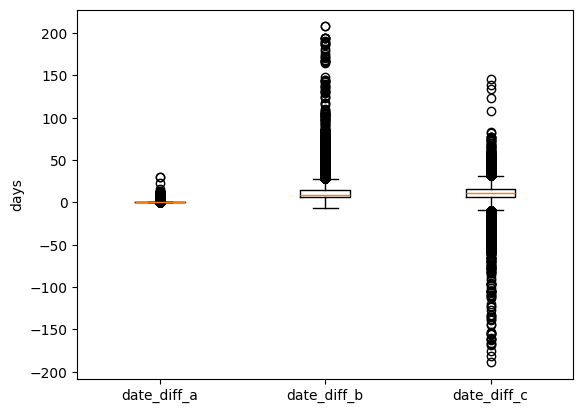

In [25]:
# 날짜 시각화
data = [orders_date['date_diff_a'].tolist(),
        orders_date['date_diff_b'].tolist(),
        orders_date['date_diff_c'].tolist(),
       ]
plt.boxplot(data)
plt.xticks([1,2,3],['date_diff_a','date_diff_b','date_diff_c'])
plt.ylabel('days')
plt.show()

##### date_diff_c가 음수값이 많지만 2921번 빼고는 다 order_status가 deliverd로 되어있음
따라서 이상치로 보지않음

### 🚨 날짜 데이터 이상치 없음